problem: unbalanced dataset,
solution: Random Oversampling/SMOTE

In [27]:
import pandas as pd
from imblearn.pipeline import Pipeline
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [5]:
test_data = pd.read_csv("Data/test_data.csv", header=None)
train_data = pd.read_csv("Data/train_data.csv",header=None)
train_labels = pd.read_csv("Data/train_labels.csv", header=None)

In [6]:
train_labels

,0
0,1
1,1
2,1
3,1
4,1
...,...
3745,-1
3746,1
3747,1
3748,1


In [12]:
train_X, test_X, train_y, test_y = train_test_split(train_data, train_labels, test_size=0.3, random_state=2)

In [18]:
def sampling(X, y: np.array) -> list:
    
    oversampling = RandomOverSampler(sampling_strategy=0.2)
    undersampling = RandomUnderSampler(sampling_strategy=0.5)

    steps = [('o', oversampling), ('u', undersampling)]
    pipeline = Pipeline(steps=steps)

    X_resampled, y_resampled = pipeline.fit_resample(X, y)
    
    return [X_resampled, y_resampled]

In [19]:
X_resampled, y_resampled = sampling(train_X, train_y)

In [25]:
def save_data(train_X, test_X, train_y: np.array) -> None:
    """Save to npy file"""
    
    np.save('processed_train_X.npy', train_X)
    np.save('processed_test_X.npy', test_X)
    np.save('processed_train_y.npy', train_y)
    
    print("Saving has been completed.")

In [26]:
save_data(X_resampled, test_X, y_resampled)


Saving has been completed.


In [30]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [33]:
y_resampled

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
1408,1
1409,1
1410,1
1411,1


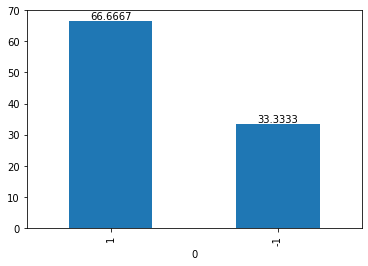

In [34]:
temp_df = (y_resampled.groupby(0).size().sort_values(ascending=False) / y_resampled.groupby(0).size().sort_values(ascending=False).sum())*100
ax = temp_df.plot(kind='bar')
ax.bar_label(ax.containers[0])  
plt.show()